# Geographic Visualization

#### Data wrangling
#### Codnuct Consistency Checks

             - Missing Values
             - Duplicates Check
             - Extreme Values Check

#### Duplicates Check
#### Extreme Values Checks
#### Plotting Choropleths

### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# show matplotlib visualizations in the notebook
%matplotlib inline

In [3]:
path = r'/Users/azadehrezaei/Desktop/NAEP Results Analysis/02 Data'

In [4]:
# Importing the assessment results:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'states_all_extended_clean.csv'))

In [5]:
df.head()

,Unnamed: 0,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,0,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Importing the location data:
country_geo = r'/Users/azadehrezaei/Desktop/NAEP Results Analysis/02 Data/Original Data/us-states.json'

In [7]:
country_geo

'/Users/azadehrezaei/Desktop/NAEP Results Analysis/02 Data/Original Data/us-states.json'

In [8]:
# To look at the JSON file contents here:

f = open(r'/Users/azadehrezaei/Desktop/NAEP Results Analysis/02 Data/Original Data/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

## Data Wrangling:

- I noticed that the "STATE" column in the original set needs to be renamed so it matches the name of the state column in the  country_geo table: 


In [9]:
df.head()

,Unnamed: 0,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,0,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Making sure the case of the State Column is the same in all files:
df['STATE'] = df['STATE'].str.title()

In [11]:
df.head()

,Unnamed: 0,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,0,2003_ALABAMA,Alabama,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2003_ALASKA,Alaska,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2003_ARIZONA,Arizona,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2003_ARKANSAS,Arkansas,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2003_CALIFORNIA,California,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Codnuct Consistency Checks:

#### - Missing Values
#### - Duplicates Check
#### - Extreme Values Check

In [12]:
df.isnull().sum()

Unnamed: 0                0
PRIMARY_KEY               0
STATE                     0
YEAR                      0
ENROLL                  120
                       ... 
G08_AM_A_MATHEMATICS    417
G08_HP_A_READING        463
G08_HP_A_MATHEMATICS    464
G08_TR_A_READING        336
G08_TR_A_MATHEMATICS    332
Length: 69, dtype: int64

   I am going to hold off on deleting any rows and create subsets for each step if needed. 

## Duplicates Check:

In [13]:
dups = df.duplicated()

In [14]:
dups.shape # no dups

(477,)

## Extreme Values Checks:

<AxesSubplot:xlabel='G08_A_A_MATHEMATICS', ylabel='Count'>

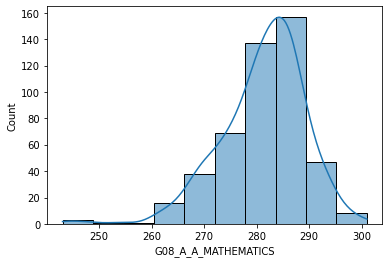

In [15]:
sns.histplot(df['G08_A_A_MATHEMATICS'], bins = 10, kde = True) # Shows extreme values for 8th grade math

I am not going to remove any of the extreme values in any of the columns. I've already checked and know that the assessment scores for both subjects (mathematics and readin) in both grades (4th and 8th) is within the acceptable range of 0 - 500. As undesirable as the lower scores are, they are the true results of these assessments and therefore I am keeping them all as they are. 

## Plotting Choropleths:

### Mathematics Assessment performance

In [16]:
# 8th Grade Mathematics Assessment
map = folium.Map(location = [48, -102], zoom_start = 3)

In [17]:
data_to_plot = df[['STATE', 'G08_A_A_MATHEMATICS']]

bins = list(df['G08_A_A_MATHEMATICS'].quantile([0, 0.25, 0.5, 0.75, 1]))
map = folium.Map(location = [48, -102], zoom_start = 3)
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['STATE', 'G08_A_A_MATHEMATICS'],
    key_on = 'feature.properties.name',
    fill_color = 'PuBuGn', 
    threshold_scale=bins,
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name = "8th Grade Mathematics Assessment",
    bins = bins,
    reset = True,
).add_to(map),
   

folium.LayerControl().add_to(map)

map

In [18]:
# 4th Grade Mathematics Assessment
map_1 = folium.Map(location = [48, -102], zoom_start = 3)

In [19]:
data_to_plot_1 = df[['STATE', 'G04_A_A_MATHEMATICS']]

bins_1 = list(df['G04_A_A_MATHEMATICS'].quantile([0, 0.25, 0.5, 0.75, 1]))
map_1 = folium.Map(location = [48, -102], zoom_start = 3)
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_1,
    columns = ['STATE', 'G04_A_A_MATHEMATICS'],
    key_on = 'feature.properties.name',
    fill_color = 'PuBuGn', 
    threshold_scale=bins_1,
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name = "4th Grade Mathematics Assessment",
    bins = bins_1,
    reset = True,
).add_to(map_1),
   

folium.LayerControl().add_to(map_1)

map_1

### Reading Assessment performance

In [20]:
# 8th Grade Reading Assessment
map_2 = folium.Map(location = [48, -102], zoom_start = 3)

In [21]:
data_to_plot_2 = df[['STATE', 'G08_A_A_READING']]

bins_2 = list(df['G08_A_A_READING'].quantile([0, 0.25, 0.5, 0.75, 1]))
map_2 = folium.Map(location = [48, -102], zoom_start = 3)
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_2,
    columns = ['STATE', 'G08_A_A_READING'],
    key_on = 'feature.properties.name',
    fill_color = 'PuBuGn', 
    threshold_scale=bins_2,
    fill_opacity=0.5, 
    line_opacity=0.2, 
    legend_name = "8th Grade Reading Assessment",
    bins = bins_2,
    reset = True,
).add_to(map_2),
   

folium.LayerControl().add_to(map_2)

map_2

In [22]:
# 4th Grade Reading Assessment
map_3 = folium.Map(location = [48, -102], zoom_start = 3)

In [23]:
data_to_plot_3 = df[['STATE', 'G04_A_A_READING']]

bins_3 = list(df['G04_A_A_READING'].quantile([0, 0.25, 0.5, 0.75, 1]))
map_3 = folium.Map(location = [48, -102], zoom_start = 3)
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_3,
    columns = ['STATE', 'G04_A_A_READING'],
    key_on = 'feature.properties.name',
    fill_color = 'PuBuGn', 
    threshold_scale=bins_3,
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name = "4th Grade Reading Assessment",
    bins = bins_3,
    reset = True,
).add_to(map_3),
   

folium.LayerControl().add_to(map_3)

map_3

In the previous analysis I saw how most of the assessments scores meet the "Basic" NAEP requirements. As a result of that, trying to look at the same results in a choropleth map will only result in mostly a single color scheme. That's why I decided to look at the 4 quartiles instead. 
I find it interesting that the bottom 25% of the scores are mostly from the southern and south-western states and that the east coast and northern state scores are generally higher in all categories! 

- A new possible research question: Looking at the assessment scores base don the 4 main regions in the U.S. and how policy making might have been different in these regions

### Revenue and Instruction Expenditure Choropleths

I removed the years 2017 and 2019 from the df set since there were too many missing values in these two years. There were still 14 missing values after doing so, so I imputed the values of these records and replaced them with the median values:

In [24]:
# Creating a subset for the revenue data:
data_to_plot_4 = df[df['YEAR']< 2017]

In [25]:
data_to_plot_4 = data_to_plot_4[['STATE', 'STATE_REVENUE']]

In [26]:
data_to_plot_4.isnull().sum() # the missing values are the revenues for the years 2017 and 2019

STATE             0
STATE_REVENUE    14
dtype: int64

In [27]:
data_to_plot_4['STATE_REVENUE'].fillna(data_to_plot_4['STATE_REVENUE'].median(), inplace=True)

In [28]:
data_to_plot_4.isnull().sum()

STATE            0
STATE_REVENUE    0
dtype: int64

In [29]:
# State Revenue
map_4 = folium.Map(location = [48, -102], zoom_start = 3)

In [30]:
bins_4 = list(df['STATE_REVENUE'].quantile([0, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_4,
   
    columns = ['STATE', 'STATE_REVENUE'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', 
    threshold_scale=bins_4,
    fill_opacity=0.5, 
    line_opacity=0.5,
    legend_name = "State Revenue",
    bins = bins_4,
    reset = True,
).add_to(map_4),
   

folium.LayerControl().add_to(map_4)

map_4

- Repeating the same steps for INSTRUCTION_EXPENDITURE and removing the years 2017 and 2019 and imputing the median value for the remaining 14 missing values:

In [31]:
# Creating a subset for the Instruction_Expenditure data:
data_to_plot_5 = df[df['YEAR']< 2017]

In [32]:
data_to_plot_5 = data_to_plot_5[['STATE', 'INSTRUCTION_EXPENDITURE']]

In [33]:
data_to_plot_5.isnull().sum() # the missing values are the instruction expenditure for the years 2017 and 2019

STATE                       0
INSTRUCTION_EXPENDITURE    14
dtype: int64

In [34]:
data_to_plot_5['INSTRUCTION_EXPENDITURE'].fillna(data_to_plot_5['INSTRUCTION_EXPENDITURE'].median(), inplace=True)

In [35]:
data_to_plot_5.isnull().sum()

STATE                      0
INSTRUCTION_EXPENDITURE    0
dtype: int64

In [36]:
# Instruction Expenditure
map_5 = folium.Map(location = [48, -102], zoom_start = 3)

bins_5 = list(df['INSTRUCTION_EXPENDITURE'].quantile([0, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_5,
   
    columns = ['STATE', 'INSTRUCTION_EXPENDITURE'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', 
    threshold_scale=bins_5,
    fill_opacity=0.5, 
    line_opacity=0.5,
    legend_name = "Instruction Expenditure",
    bins = bins_5,
    reset = True,
).add_to(map_5),
   

folium.LayerControl().add_to(map_5)

map_5





It is definitely not surprising to see that the northeastern states and the east coast that had better performance in both subject matter assessments have both higher state revenue and higher instruction expenditure. It is however very interesting how some of the southern/south west states, like California, are in the top quartile in state revenue and instruction expenditure but were placed at the lower quartile in the perfomance. 
Once again, I think looking at the policy differences between these two groups can lead us to better/other indicators that can affect student performance. 